In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from seaborn import objects as so
from matplotlib import gridspec

In [3]:
sales_df = pd.read_excel('data/Grupo_4.xlsx', sheet_name=['Santa Ana','La Floresta'])
sales_df['La Floresta']

,Fecha,Ventas
0,2023-01-01,16298.062460
1,2023-01-02,18711.283012
2,2023-01-03,19788.792981
3,2023-01-04,22003.462132
4,2023-01-05,20387.799178
...,...,...
360,2023-12-27,23014.794169
361,2023-12-28,22825.600188
362,2023-12-29,19173.296859
363,2023-12-30,22544.923294


In [18]:
# Agregamos dia de la semana y mes
for element in sales_df.values():
    element['Mes'] = element.Fecha.dt.month
    element['Dia Semana'] = element.Fecha.dt.day_of_week # 0=Monday and 6 Sunday


In [31]:
sales_df['La Floresta']


,Fecha,Ventas,Mes,Dia Semana
0,2023-01-01,16298.062460,1,6
1,2023-01-02,18711.283012,1,0
2,2023-01-03,19788.792981,1,1
3,2023-01-04,22003.462132,1,2
4,2023-01-05,20387.799178,1,3
...,...,...,...,...
360,2023-12-27,23014.794169,12,2
361,2023-12-28,22825.600188,12,3
362,2023-12-29,19173.296859,12,4
363,2023-12-30,22544.923294,12,5


In [23]:
def generate_distribution(sales_df, column_name='Ventas'):
    fig = plt.figure(figsize=(12,6))
    gs = gridspec.GridSpec(ncols=len(sales_df), nrows=1, figure=fig)
    for index, key in enumerate(sales_df):
        ax1 = fig.add_subplot(gs[0, index])
        sns.ecdfplot(sales_df[key][column_name])
        ax1.set_title(key + " " + column_name)
# ax[0].legend(loc='upper right')
# ax[0].grid(True)
#     ax2 = fig.add_subplot(gs[0,1])
#     sns.ecdfplot(sales_df['La Floresta']['Ventas'])
#     ax2.set_title('Ventas La Floresta')

    plt.tight_layout()
    plt.show()

In [45]:
merged_sales_df = sales_df['Santa Ana']
merged_sales_df['Sucursal'] = ['Santa Ana']* len(sales_df['Santa Ana'])
# for key in sales_df:
#     sns.barplot(sales_df[key].groupby(['Mes'])['Ventas'].sum(), label=key, co)
#     
# plt.show()
merged_sales_df


,Fecha,Ventas,Mes,Dia Semana,Sucursal
0,2023-01-01,11390.705369,1,6,Santa Ana
1,2023-01-02,16122.907022,1,0,Santa Ana
2,2023-01-03,19609.303029,1,1,Santa Ana
3,2023-01-04,16734.047386,1,2,Santa Ana
4,2023-01-05,17983.552354,1,3,Santa Ana
...,...,...,...,...,...
360,2023-12-27,21916.723904,12,2,Santa Ana
361,2023-12-28,16629.301176,12,3,Santa Ana
362,2023-12-29,16115.000362,12,4,Santa Ana
363,2023-12-30,15186.159194,12,5,Santa Ana


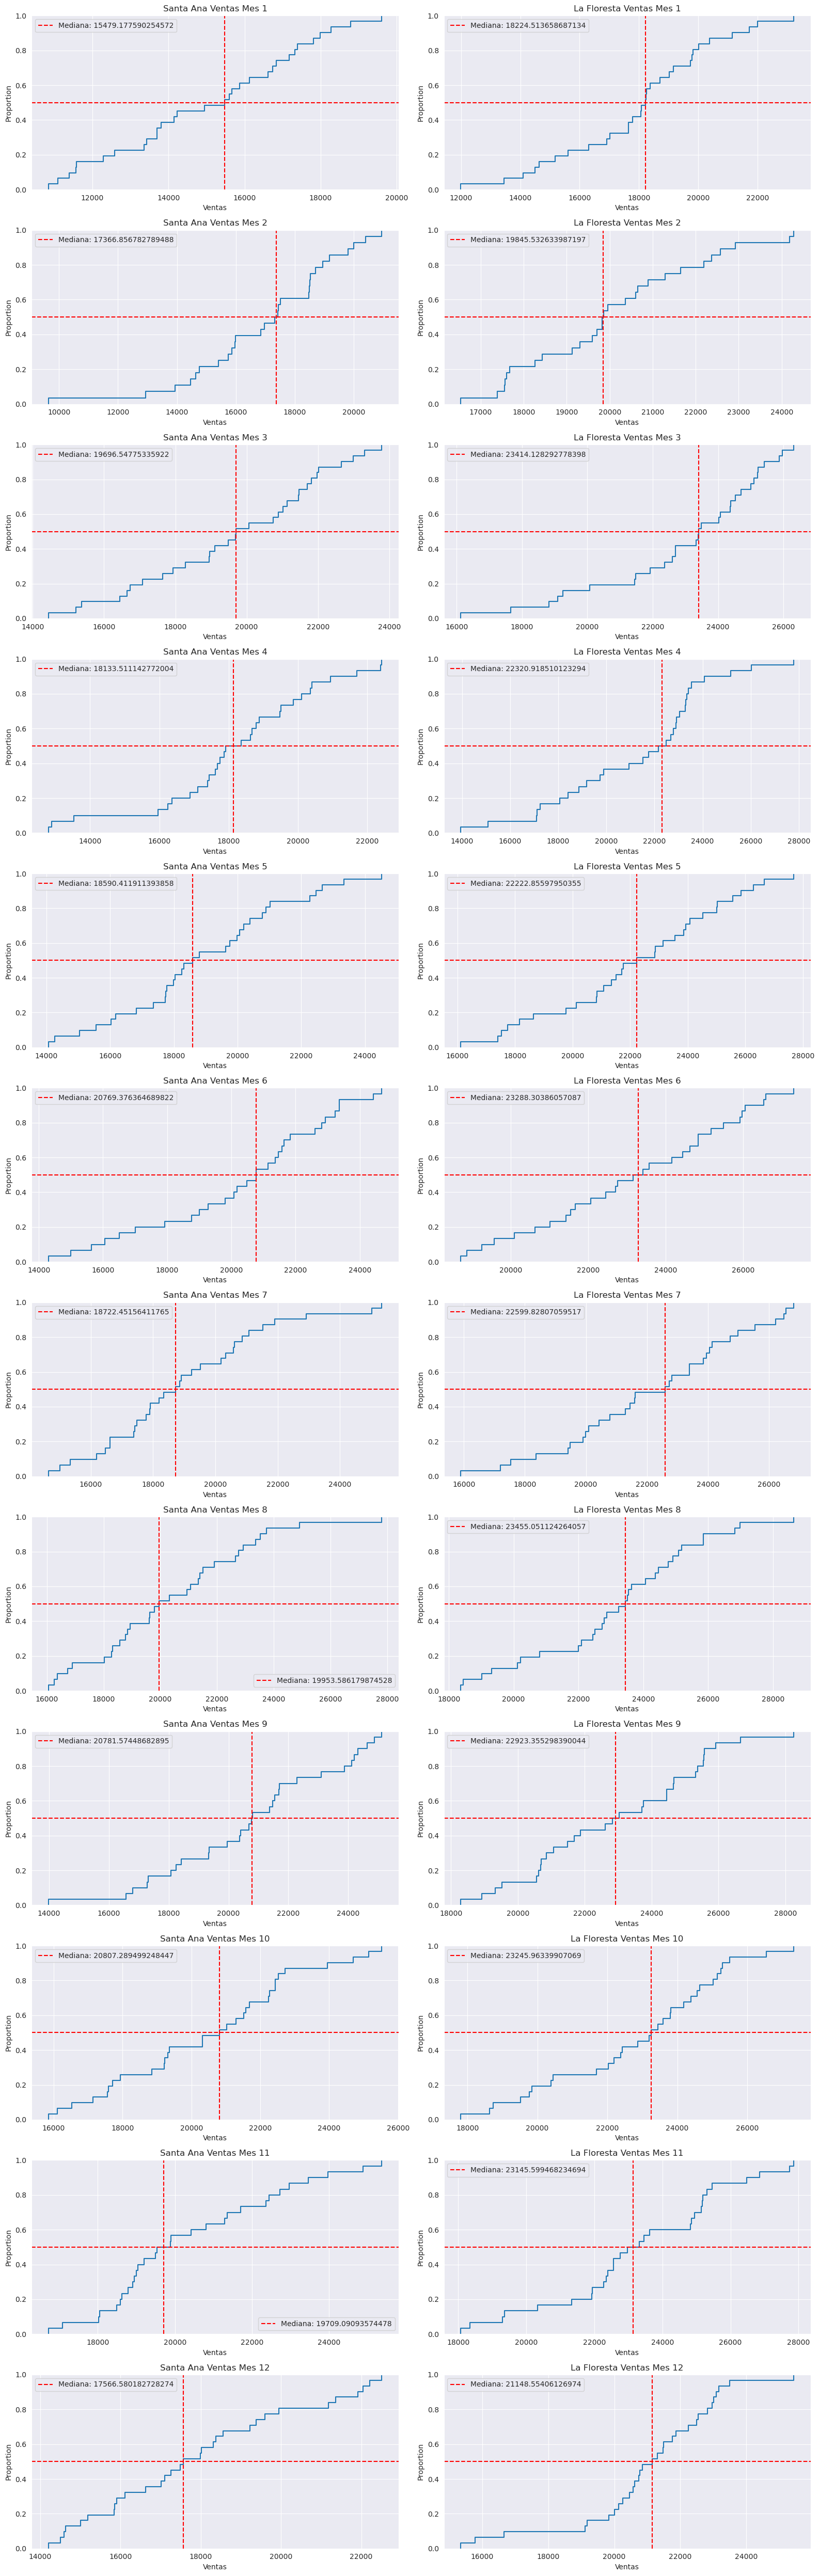

In [28]:
# Mensual
sales_by_month = dict()
fig = plt.figure(figsize=(16,50))
gs = gridspec.GridSpec(ncols=len(sales_df), nrows=12, figure=fig)
median = dict()
for index, key in enumerate(sales_df):
    median[key] = np.array(np.zeros(12))
    for i in range(0,12,1):
        ax1 = fig.add_subplot(gs[ i, index])
        data = sales_df[key][sales_df[key]['Mes'] == i+1]['Ventas']
        sns.ecdfplot(data)
        median_number = np.median(data)
        median[key][i] = median_number
        ax1.axvline(x=median_number, color='r', linestyle='--', label=f'Mediana: {median_number}')
        ax1.axhline(0.5, color='r', linestyle='--')
        ax1.set_title(key + " Ventas Mes " + str(i+1))
        ax1.legend()
        
        # sales_by_month.update({key:sales_df[key].drop(columns=['Fecha', 'Dia Semana']).groupby(by=['Mes']).sum().reset_index()})

plt.tight_layout()
plt.show()

In [27]:
median

{'Santa Ana': array([15479.17759025, 17366.85678279, 19696.54775336, 18133.51114277,
        18590.41191139, 20769.37636469, 18722.45156412, 19953.58617987,
        20781.57448683, 20807.28949925, 19709.09093574, 17566.58018273]),
 'La Floresta': array([18224.51365869, 19845.53263399, 23414.12829278, 22320.91851012,
        22222.8559795 , 23288.30386057, 22599.8280706 , 23455.05112426,
        22923.35529839, 23245.96339907, 23145.59946823, 21148.55406127])}

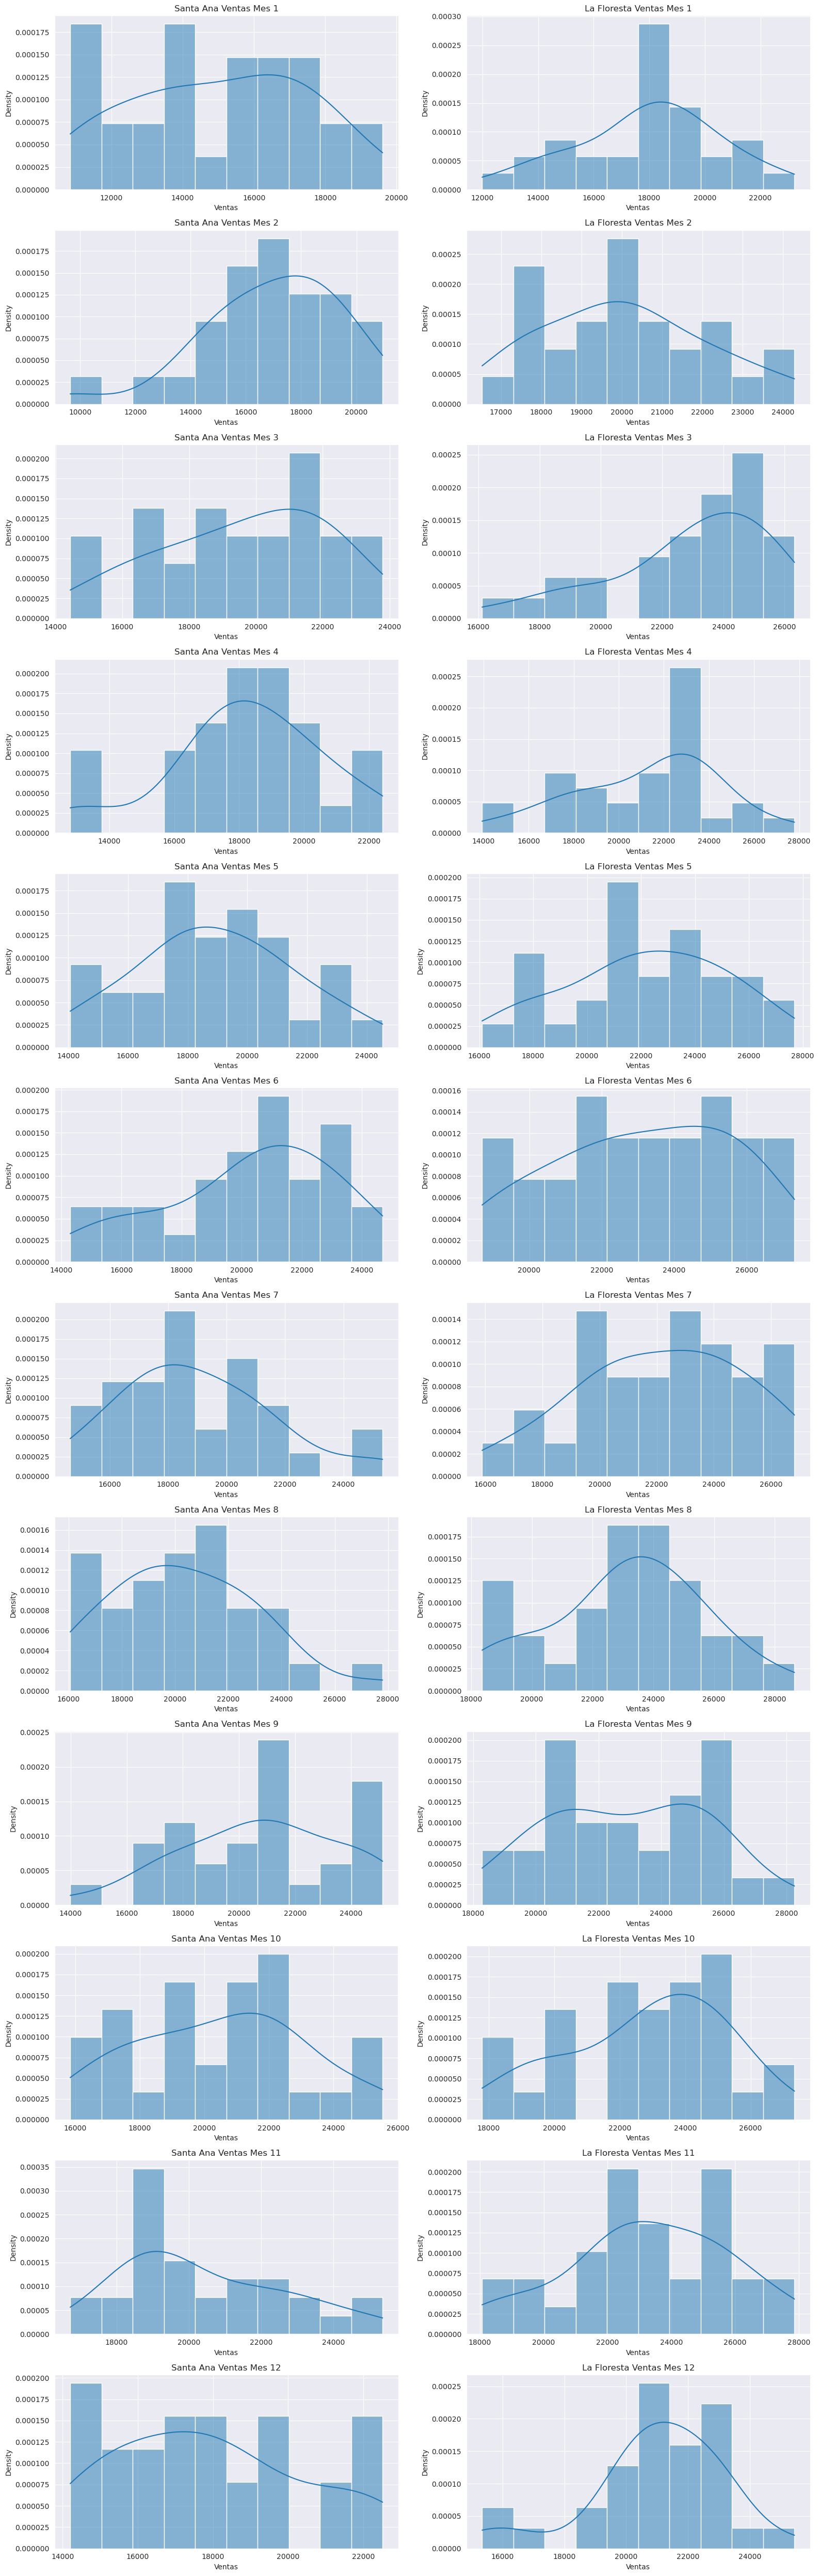

In [34]:
# Mensual
bins=10
sales_by_month = dict()
fig = plt.figure(figsize=(16,50))
gs = gridspec.GridSpec(ncols=len(sales_df), nrows=12, figure=fig)
for index, key in enumerate(sales_df):
    for i in range(1,13,1):
        ax1 = fig.add_subplot(gs[ i-1, index])
        data = sales_df[key][sales_df[key]['Mes'] == i]['Ventas']
        
        h = (data.max()-data.min())/bins
        # sns.kdeplot(data)
        sns.histplot(data, kde=True, stat='density', bins=bins, binwidth=h)
        # p = so.Plot(data, x='Ventas')
        # p.add(so.Area(), so.KDE())
        ax1.set_title(key + " Ventas Mes " + str(i))
        
        # sales_by_month.update({key:sales_df[key].drop(columns=['Fecha', 'Dia Semana']).groupby(by=['Mes']).sum().reset_index()})

plt.tight_layout()
plt.show()

In [7]:
# generate_distribution(sales_by_month, 'Ventas')

In [27]:
# Mensual
sales_by_day = dict()
for key in sales_df:
    sales_by_day.update({key:sales_df[key].drop(columns=['Fecha', 'Mes']).groupby(by=['Dia Semana']).sum().reset_index()})


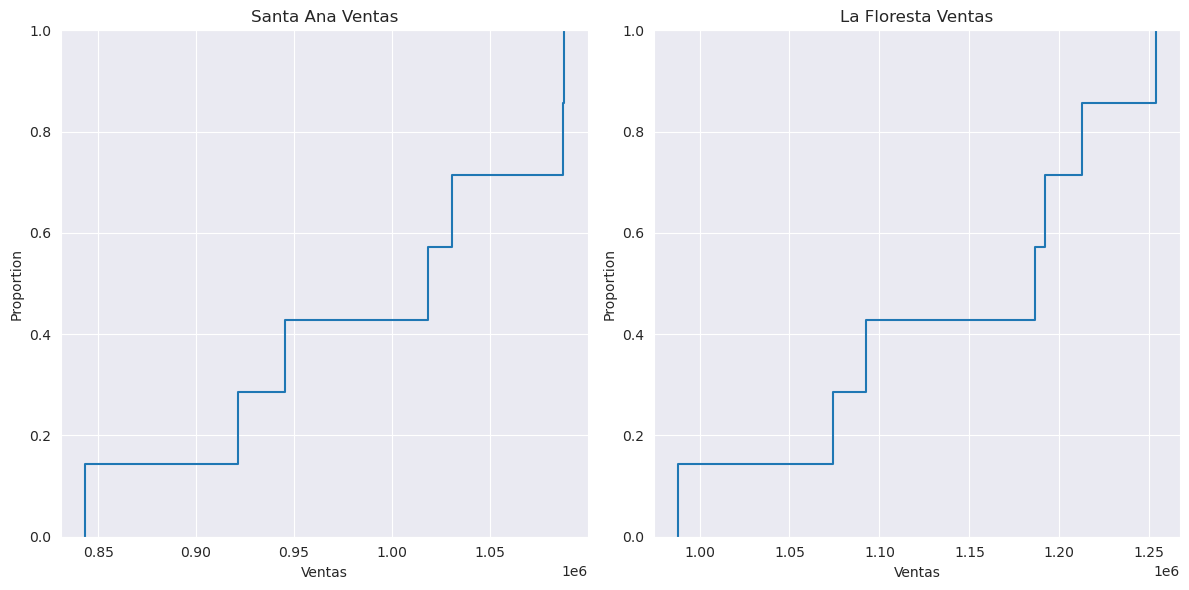

In [28]:
generate_distribution(sales_by_day, 'Ventas')

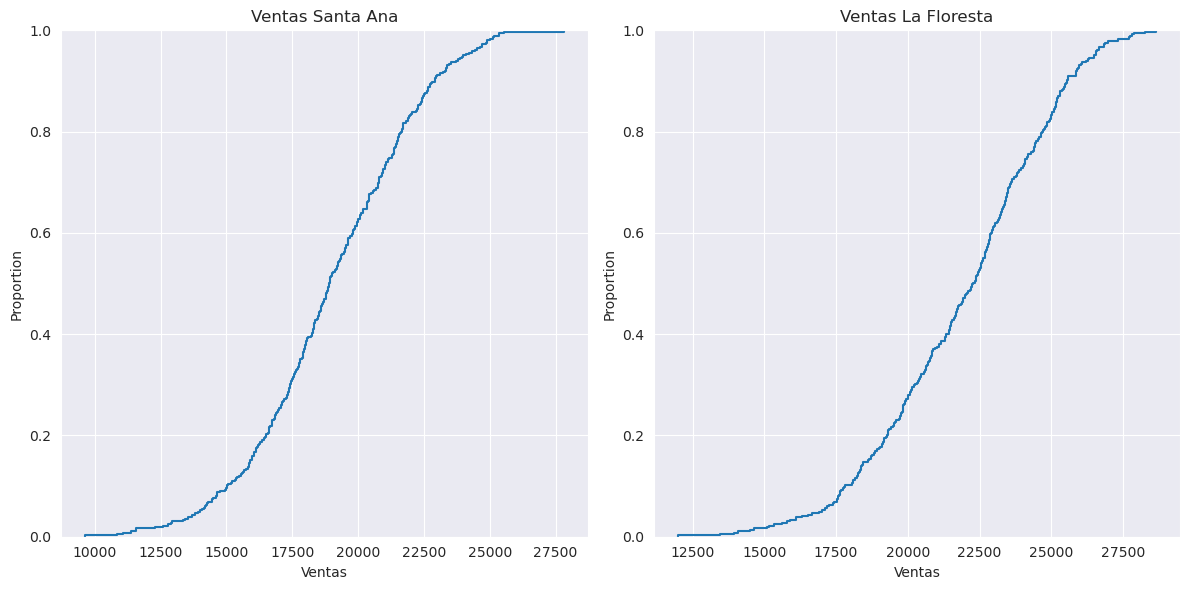

In [29]:
fig = plt.figure(figsize=(12,6))
gs = gridspec.GridSpec(ncols=2, nrows=1, figure=fig)
ax1 = fig.add_subplot(gs[0,0])
sns.ecdfplot(sales_df['Santa Ana']['Ventas'])
ax1.set_title('Ventas Santa Ana')
# ax[0].legend(loc='upper right')
# ax[0].grid(True)
ax2 = fig.add_subplot(gs[0,1])
sns.ecdfplot(sales_df['La Floresta']['Ventas'])
ax2.set_title('Ventas La Floresta')

plt.tight_layout()
plt.show()

In [30]:
sales_ordered = sales_df[0].sort_values(by='Ventas', ascending=True).reset_index()
plt.plot(sales_ordered['Ventas'], (sales_ordered['Ventas'].index+1)/sales_ordered['Ventas'].size, scaley=False)
sales_ordered['Ventas']

KeyError: 0

In [ ]:
sns.histplot(sales_ordered['Ventas'], kde=True)

In [ ]:
#Ventas Mensuales
sales_by_month = sales_df[0].drop(columns=['Fecha']).groupby(by=['Mes']).sum().reset_index()
sales_by_month_orderer = sales_by_month.sort_values(by='Ventas', ascending=True).reset_index(drop=True)
plt.step(sales_by_month_orderer['Ventas'], (sales_by_month_orderer.index+1)/sales_by_month_orderer.Ventas.size)
sales_by_month_orderer.size

In [ ]:
sns.histplot(sales_by_month_orderer['Ventas'], bins=10)